In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# 4 Build an Investment Strategy from Model
## 4.1 Import 2015-2018 Financial Data to test the strategy

In [2]:
df2015 = pd.read_csv("2015_Financial_Data.csv")
df2015 = pd.DataFrame(df2015[["Unnamed: 0", "Revenue", "Profit Margin", "returnOnEquity", "Book Value per Share", "Operating Cash Flow", "2016 PRICE VAR [%]", "Class"]])
df2015.rename(columns={"Unnamed: 0":"Symbol", "Revenue":"2015 Revenue", "Profit Margin":"2015 Profit Margin", "returnOnEquity":"2015 ROE", "Book Value per Share": "2015 BPS", "Operating Cash Flow":"2015 OCF", "Class":"2016 Class"}, inplace=True)

df2016 = pd.read_csv("2016_Financial_Data.csv")
df2016 = pd.DataFrame(df2016[["Unnamed: 0", "Revenue", "Profit Margin", "returnOnEquity", "Book Value per Share", "Operating Cash Flow", "2017 PRICE VAR [%]", "Class"]])
df2016.rename(columns={"Unnamed: 0":"Symbol", "Revenue":"2016 Revenue", "Profit Margin":"2016 Profit Margin", "returnOnEquity":"2016 ROE", "Book Value per Share": "2016 BPS", "Operating Cash Flow":"2016 OCF", "Class":"2017 Class"}, inplace=True)

df2017 = pd.read_csv("2017_Financial_Data.csv")
df2017 = pd.DataFrame(df2017[["Unnamed: 0", "Revenue", "Profit Margin", "returnOnEquity", "Book Value per Share", "Operating Cash Flow", "2018 PRICE VAR [%]", "Class"]])
df2017.rename(columns={"Unnamed: 0":"Symbol", "Revenue":"2017 Revenue", "Profit Margin":"2017 Profit Margin", "returnOnEquity":"2017 ROE", "Book Value per Share": "2017 BPS", "Operating Cash Flow":"2017 OCF", "Class":"2018 Class"}, inplace=True)

df2018 = pd.read_csv("2018_Financial_Data.csv")
df2018 = pd.DataFrame(df2018[["Unnamed: 0", "Revenue", "Profit Margin", "returnOnEquity", "Book Value per Share", "Operating Cash Flow", "2019 PRICE VAR [%]", "Class"]])
df2018.rename(columns={"Unnamed: 0":"Symbol", "Revenue":"2018 Revenue", "Profit Margin":"2018 Profit Margin", "returnOnEquity":"2018 ROE", "Book Value per Share": "2018 BPS", "Operating Cash Flow":"2018 OCF", "Class":"2019 Class"}, inplace=True)

df = pd.merge(df2015, df2016, how="inner", on="Symbol")
df = pd.merge(df, df2017, how="inner", on="Symbol")
df = pd.merge(df, df2018, how="inner", on="Symbol")
df.dropna(inplace=True)
df.reset_index(inplace=True)
df

,index,Symbol,2015 Revenue,2015 Profit Margin,2015 ROE,2015 BPS,2015 OCF,2016 PRICE VAR [%],2016 Class,2016 Revenue,...,2017 OCF,2018 PRICE VAR [%],2018 Class,2018 Revenue,2018 Profit Margin,2018 ROE,2018 BPS,2018 OCF,2019 PRICE VAR [%],2019 Class
0,0,PG,7.074900e+10,0.0990,0.1116,23.2400,1.460800e+10,10.809451,1,6.529900e+10,...,1.275300e+10,4.975151,1,6.683200e+10,0.1460,0.1844,21.0300,1.486700e+10,40.680273,1
1,1,VIPS,6.193685e+09,0.0062,0.4492,0.9422,2.950371e+08,-21.637010,0,8.148496e+09,...,1.483148e+08,-56.320000,0,1.223212e+10,0.0036,0.1233,3.7774,8.315120e+08,160.000010,1
2,2,KR,1.084650e+11,0.0160,0.3193,5.5170,4.215000e+09,-15.036503,0,1.098300e+11,...,4.272000e+09,-0.990449,0,1.226620e+11,0.0160,0.2751,7.7440,3.413000e+09,8.690633,1
3,3,RAD,2.652838e+10,0.0800,36.9667,1.1620,6.489590e+08,4.303799,1,2.077024e+10,...,2.321170e+08,-66.666666,0,2.152897e+10,0.0440,0.5893,29.9950,2.663440e+08,0.454550,1
4,4,GIS,1.763030e+10,0.0690,0.2444,8.3820,2.542800e+09,10.693172,1,1.656310e+10,...,2.415200e+09,-31.280412,0,1.574040e+10,0.1350,0.3470,10.7710,2.841000e+09,45.027569,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583,4056,TRNS,1.236240e+08,0.0330,0.1173,5.0480,4.439000e+06,10.882961,1,1.221660e+08,...,7.544000e+06,34.893617,1,1.551410e+08,0.0380,0.1153,7.2080,9.874000e+06,63.636373,1
3584,4057,TSRI,5.740290e+07,0.0030,0.0213,4.6040,7.135220e+05,33.101842,1,6.099828e+07,...,7.503710e+05,-12.264152,0,6.499000e+07,0.0070,0.0591,4.1920,1.130665e+06,-25.208338,0
3585,4058,TZOO,1.239610e+08,0.0880,0.5080,1.4530,4.192000e+06,13.801445,1,1.142630e+08,...,2.076000e+06,46.716421,1,1.113220e+08,0.0420,0.3315,1.1410,5.317000e+06,18.232040,1
3586,4059,WSTG,3.820900e+08,0.0150,0.1508,8.3420,8.185000e+06,6.050663,1,1.646090e+08,...,-2.021000e+06,-36.405277,0,1.814440e+08,0.0190,0.0872,9.3100,1.390100e+07,68.702657,1


## 4.2 Load the trained ML Model (from GridSearch)

In [3]:
model = joblib.load("2014_model.sav")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## 4.3 Predict Next Year's Class for each stock using the ML Model

In [4]:
y2015 = pd.DataFrame(df[["2016 Class", "2016 PRICE VAR [%]"]])
y2016 = pd.DataFrame(df[["2017 Class", "2017 PRICE VAR [%]"]])
y2017 = pd.DataFrame(df[["2018 Class", "2018 PRICE VAR [%]"]])
y2018 = pd.DataFrame(df[["2019 Class", "2019 PRICE VAR [%]"]])
X2015 = pd.DataFrame(df[["2015 Revenue", "2015 Profit Margin", "2015 ROE", "2015 BPS", "2015 OCF"]])
X2016 = pd.DataFrame(df[["2016 Revenue", "2016 Profit Margin", "2016 ROE", "2016 BPS", "2016 OCF"]])
X2017 = pd.DataFrame(df[["2017 Revenue", "2017 Profit Margin", "2017 ROE", "2017 BPS", "2017 OCF"]])
X2018 = pd.DataFrame(df[["2018 Revenue", "2018 Profit Margin", "2018 ROE", "2018 BPS", "2018 OCF"]])

In [5]:
y2015_pred = model.predict(X2015)
y2015_prob = model.predict_proba(X2015)
y2015_pred = pd.DataFrame(y2015_pred, columns=['2016 Class Pred'], index=y2015.index)
y2015_prob = pd.DataFrame(list(y2015_prob[:,1]), columns=['2016 Class Prob'], index=y2015.index)
y2015_acc = pd.concat([y2015, y2015_pred, y2015_prob], axis=1)
y2015_acc

,2016 Class,2016 PRICE VAR [%],2016 Class Pred,2016 Class Prob
0,1,10.809451,1,0.500407
1,0,-21.637010,0,0.365458
2,0,-15.036503,0,0.420661
3,1,4.303799,0,0.485564
4,1,10.693172,1,0.514960
...,...,...,...,...
3583,1,10.882961,0,0.355597
3584,1,33.101842,0,0.404067
3585,1,13.801445,0,0.392142
3586,1,6.050663,0,0.370856


In [6]:
y2016_pred = model.predict(X2016)
y2016_prob = model.predict_proba(X2016)
y2016_pred = pd.DataFrame(y2016_pred, columns=['2017 Class Pred'], index=y2016.index)
y2016_prob = pd.DataFrame(list(y2016_prob[:,1]), columns=['2017 Class Prob'], index=y2016.index)
y2016_acc = pd.concat([y2016, y2016_pred, y2016_prob], axis=1)
y2016_acc

,2017 Class,2017 PRICE VAR [%],2017 Class Pred,2017 Class Prob
0,1,12.532463,1,0.514849
1,1,4.363319,0,0.360990
2,0,-17.068252,0,0.432502
3,0,-75.916870,0,0.434765
4,0,-1.162942,0,0.484371
...,...,...,...,...
3583,1,34.433957,0,0.353783
3584,1,0.655807,0,0.419936
3585,0,-35.500002,0,0.402907
3586,0,-2.854095,0,0.373581


In [7]:
y2017_pred = model.predict(X2017)
y2017_prob = model.predict_proba(X2017)
y2017_pred = pd.DataFrame(y2017_pred, columns=['2018 Class Pred'], index=y2017.index)
y2017_prob = pd.DataFrame(list(y2017_prob[:,1]), columns=['2018 Class Prob'], index=y2017.index)
y2017_acc = pd.concat([y2017, y2017_pred, y2017_prob], axis=1)
y2017_acc

,2018 Class,2018 PRICE VAR [%],2018 Class Pred,2018 Class Prob
0,1,4.975151,1,0.534050
1,0,-56.320000,0,0.345864
2,0,-0.990449,0,0.436364
3,0,-66.666666,0,0.364757
4,0,-31.280412,0,0.493237
...,...,...,...,...
3583,1,34.893617,0,0.366681
3584,0,-12.264152,0,0.400801
3585,1,46.716421,0,0.355046
3586,0,-36.405277,0,0.363401


In [8]:
y2018_pred = model.predict(X2018)
y2018_prob = model.predict_proba(X2018)
y2018_pred = pd.DataFrame(y2018_pred, columns=['2019 Class Pred'], index=y2018.index)
y2018_prob = pd.DataFrame(list(y2018_prob[:,1]), columns=['2019 Class Prob'], index=y2018.index)
y2018_acc = pd.concat([y2018, y2018_pred, y2018_prob], axis=1)
y2018_acc

,2019 Class,2019 PRICE VAR [%],2019 Class Pred,2019 Class Prob
0,1,40.680273,1,0.511014
1,1,160.000010,0,0.422012
2,1,8.690633,0,0.433950
3,1,0.454550,0,0.367235
4,1,45.027569,0,0.473795
...,...,...,...,...
3583,1,63.636373,0,0.374532
3584,0,-25.208338,0,0.435052
3585,1,18.232040,0,0.384914
3586,1,68.702657,0,0.397185


## 4.4 Create functions to simulate different investment strategies
Since we already calculated the Class=1 (Buy) probability for each stock, we will test 3 investment strategies.
- Buy top n stocks with highest Class=1 (Buy) probability
- Short sell top n stocks with lowest Class=1 (Buy) probability
- Buy top n/2 stocks with highest Class=1 (Buy) probability and Short sell top n/2 stocks with lowest Class=1 (Buy) probability

In [9]:
def buy_winning(n):
    returns = []

    y_acc = [y2015_acc, y2016_acc, y2017_acc, y2018_acc]
    col_class_prob = ['2016 Class Prob', '2017 Class Prob', '2018 Class Prob', '2019 Class Prob']
    col_class_pred = ['2016 Class Pred', '2017 Class Pred', '2018 Class Pred', '2019 Class Pred']
    col_price_var = ['2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]']
    col_net = ['2016 Net', '2017 Net', '2018 Net', '2019 Net']

    for i in range(4):
        # Buy top n stocks with highest Class=1 (Buy) probability
        y_top_n = y_acc[i].nlargest(n, col_class_prob[i])

        # Buy if Class Pred = 1 (Buy stocks that will have positive returns)
        y_top_n.loc[y_top_n[col_class_pred[i]]==1, col_net[i]] = 1
        # Short Sell if Class Pred = 0 (Short Sell stocks that will have negative return)
        y_top_n.loc[y_top_n[col_class_pred[i]]==0, col_net[i]] = -1

        # times PRICE VAR [%] to find return from investment
        y_top_n[col_net[i]] = y_top_n[col_net[i]] * y_top_n[col_price_var[i]]

        # find average return for each year
        returns.append(y_top_n[col_net[i]].mean())

    return returns

def short_losing(n):
    returns = []

    y_acc = [y2015_acc, y2016_acc, y2017_acc, y2018_acc]
    col_class_prob = ['2016 Class Prob', '2017 Class Prob', '2018 Class Prob', '2019 Class Prob']
    col_class_pred = ['2016 Class Pred', '2017 Class Pred', '2018 Class Pred', '2019 Class Pred']
    col_price_var = ['2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]']
    col_net = ['2016 Net', '2017 Net', '2018 Net', '2019 Net']

    for i in range(4):
        # Short sell top n stocks with lowest Class=1 (Buy) probability
        y_top_n = y_acc[i].nsmallest(n, col_class_prob[i])

        # Buy if Class Pred = 1 (Buy stocks that will have positive returns)
        y_top_n.loc[y_top_n[col_class_pred[i]]==1, col_net[i]] = 1
        # Short Sell if Class Pred = 0 (Short Sell stocks that will have negative return)
        y_top_n.loc[y_top_n[col_class_pred[i]]==0, col_net[i]] = -1

        # times PRICE VAR [%] to find return from investment
        y_top_n[col_net[i]] = y_top_n[col_net[i]] * y_top_n[col_price_var[i]]

        # find average return for each year
        returns.append(y_top_n[col_net[i]].mean())

    return returns

def buy_win_short_lose(n):
    nshort = n//2
    nbuy = n-nshort
    returns = []

    y_acc = [y2015_acc, y2016_acc, y2017_acc, y2018_acc]
    col_class_prob = ['2016 Class Prob', '2017 Class Prob', '2018 Class Prob', '2019 Class Prob']
    col_class_pred = ['2016 Class Pred', '2017 Class Pred', '2018 Class Pred', '2019 Class Pred']
    col_price_var = ['2016 PRICE VAR [%]', '2017 PRICE VAR [%]', '2018 PRICE VAR [%]', '2019 PRICE VAR [%]']
    col_net = ['2016 Net', '2017 Net', '2018 Net', '2019 Net']

    for i in range(4):
        # Buy top nbuy stocks with highest Class=1 (Buy) probability
        y_buy = y_acc[i].nlargest(nbuy, col_class_prob[i])
        # Short sell top nshort stocks with lowest Class=1 (Buy) probability
        y_short = y_acc[i].nsmallest(nshort, col_class_prob[i])

        # Buy if Class Pred = 1 (Buy stocks that will have positive returns)
        y_buy.loc[y_buy[col_class_pred[i]]==1, col_net[i]] = 1
        y_short.loc[y_short[col_class_pred[i]]==1, col_net[i]] = 1
        # Short Sell if Class Pred = 0 (Short Sell stocks that will have negative return)
        y_buy.loc[y_buy[col_class_pred[i]]==0, col_net[i]] = -1
        y_short.loc[y_short[col_class_pred[i]]==0, col_net[i]] = -1

        # times PRICE VAR [%] to find return from investment
        y_buy[col_net[i]] = y_buy[col_net[i]] * y_buy[col_price_var[i]]
        y_short[col_net[i]] = y_short[col_net[i]] * y_short[col_price_var[i]]

        # combine top winning and top losing
        y_total = pd.concat([y_buy, y_short])

        # find average return for each year
        returns.append(y_total[col_net[i]].mean())

    return returns

## 4.5 Testing Investment Strategies with different portfolio sizes

n = 10: [40.602023100680185, 17.919336720345505, -14.816545462313798, 20.161207537877196]
n = 50: [39.78408469541871, 14.380817110319589, -10.772518635115004, 20.47306344567392]
n = 100: [34.79396410211615, 15.734991382788042, -9.196980551393052, 19.934867038125002]
n = 500: [33.49590423118224, 24.332265341646565, -9.363605881574042, 22.27184765703501]


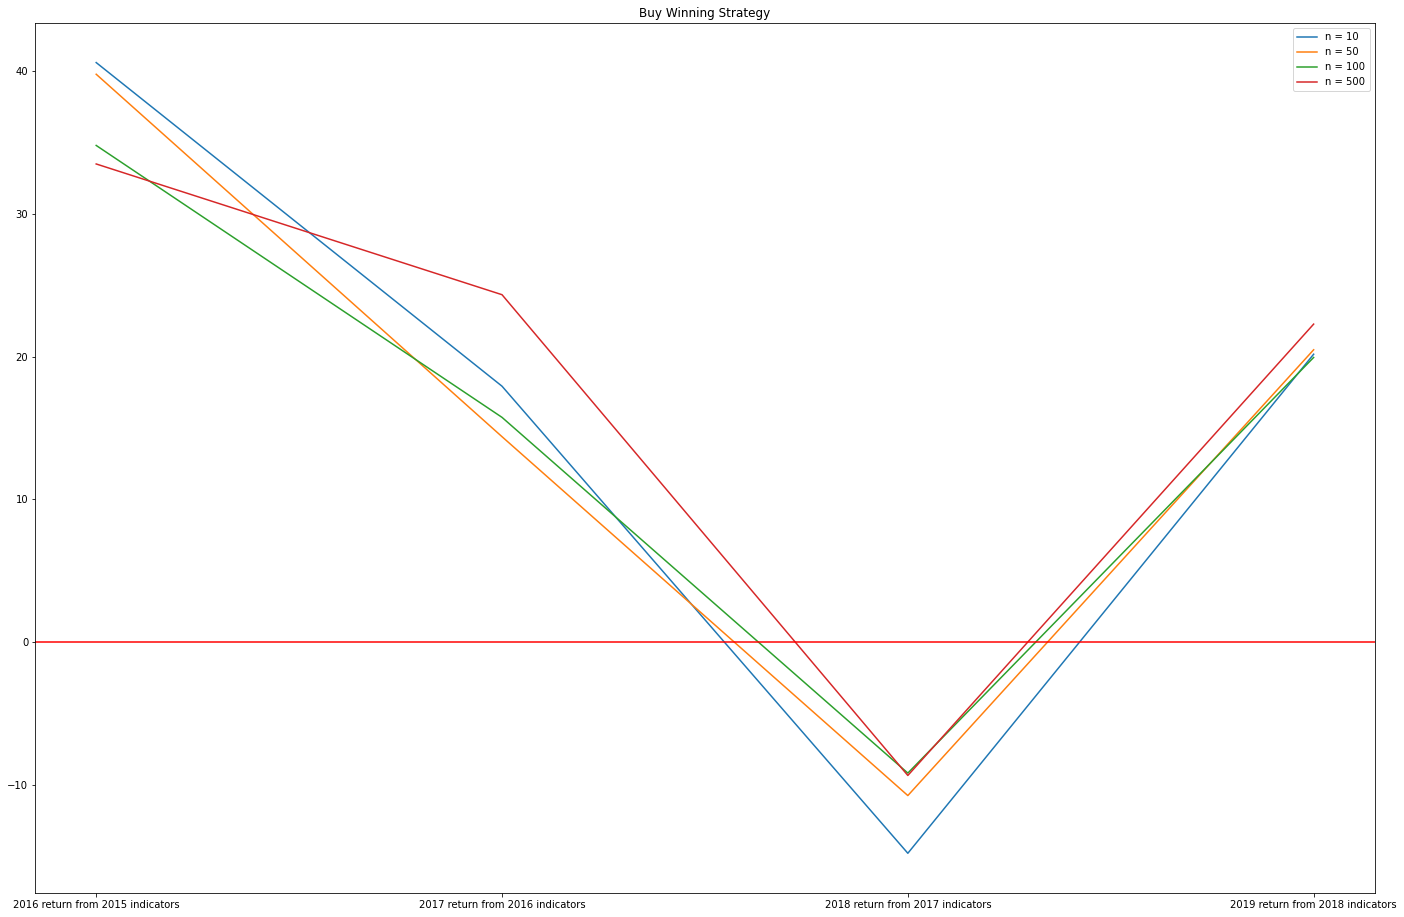

In [10]:
x = ['2016 return from 2015 indicators','2017 return from 2016 indicators','2018 return from 2017 indicators','2019 return from 2018 indicators']

# buy top 10 highest Class=1 prob
y10 = buy_winning(10)
print("n = 10:", y10)

# buy top 50 highest Class=1 prob
y50 = buy_winning(50)
print("n = 50:", y50)

# buy top 100 highest Class=1 prob
y100 = buy_winning(100)
print("n = 100:", y100)

# buy top 500 highest Class=1 prob
y500 = buy_winning(500)
print("n = 500:", y500)

plt.figure(figsize=(24, 16))

plt.plot(x,y10,label="n = 10")
plt.plot(x,y50,label="n = 50")
plt.plot(x,y100,label="n = 100")
plt.plot(x,y500,label="n = 500")

plt.title("Buy Winning Strategy")
plt.legend()
plt.axhline(0, color='red')
plt.show()

n = 10: [-50.52183934148259, -16.069165617861568, 0.9625755668630951, -16.882080805879518]
n = 50: [-28.5400592004486, -20.67319844110905, 5.77284535580144, -14.622901415782461]
n = 100: [-24.149551008380044, -18.982621638603472, 8.596188861627182, -16.61918722549479]
n = 500: [-28.821185661686634, -20.08868712250895, 9.532236630650784, -24.025912770443515]


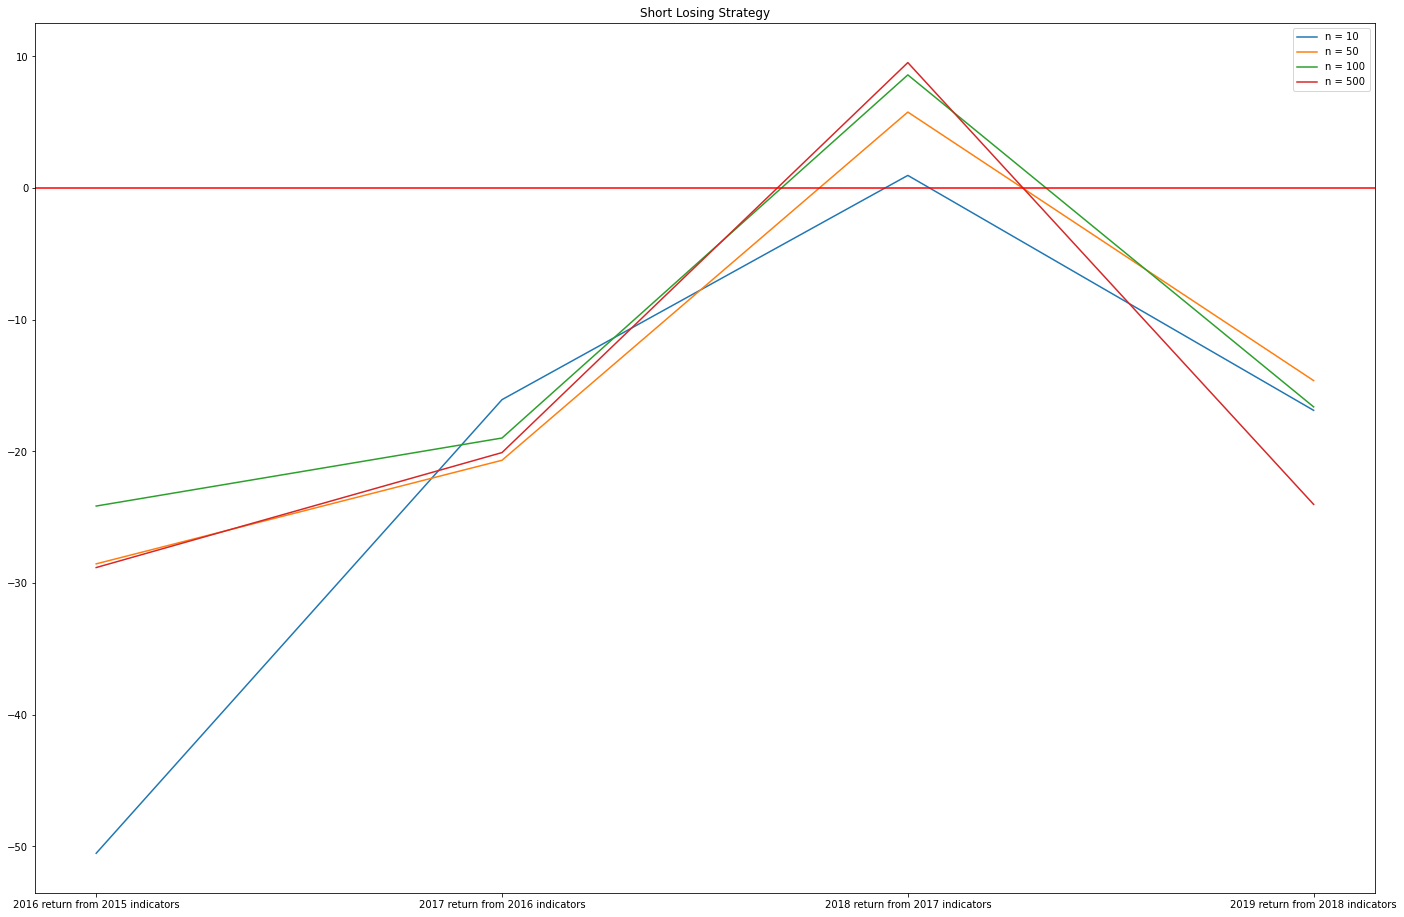

In [11]:
x = ['2016 return from 2015 indicators','2017 return from 2016 indicators','2018 return from 2017 indicators','2019 return from 2018 indicators']

# short sell top 10 lowest Class=1 prob
y10 = short_losing(10)
print("n = 10:", y10)

# short sell top 50 lowest Class=1 prob
y50 = short_losing(50)
print("n = 50:", y50)

# short sell top 100 lowest Class=1 prob
y100 = short_losing(100)
print("n = 100:", y100)

# short sell top 500 lowest Class=1 prob
y500 = short_losing(500)
print("n = 500:", y500)

plt.figure(figsize=(24, 16))

plt.plot(x,y10,label="n = 10")
plt.plot(x,y50,label="n = 50")
plt.plot(x,y100,label="n = 100")
plt.plot(x,y500,label="n = 500")

plt.title("Short Losing Strategy")
plt.legend()
plt.axhline(0, color='red')
plt.show()

n = 10: [2.646425348696441, 11.127249332351871, -6.287388461140865, 10.737987557004898]
n = 50: [5.991028756588097, 1.6653635596550957, -5.196597954972411, 4.521402635464781]
n = 100: [5.622012747485048, -3.146190665394732, -2.499836639656783, 2.925081014945727]
n = 500: [4.997826319074182, -2.9974371107709694, -0.49672895402034484, -2.9758354399186726]


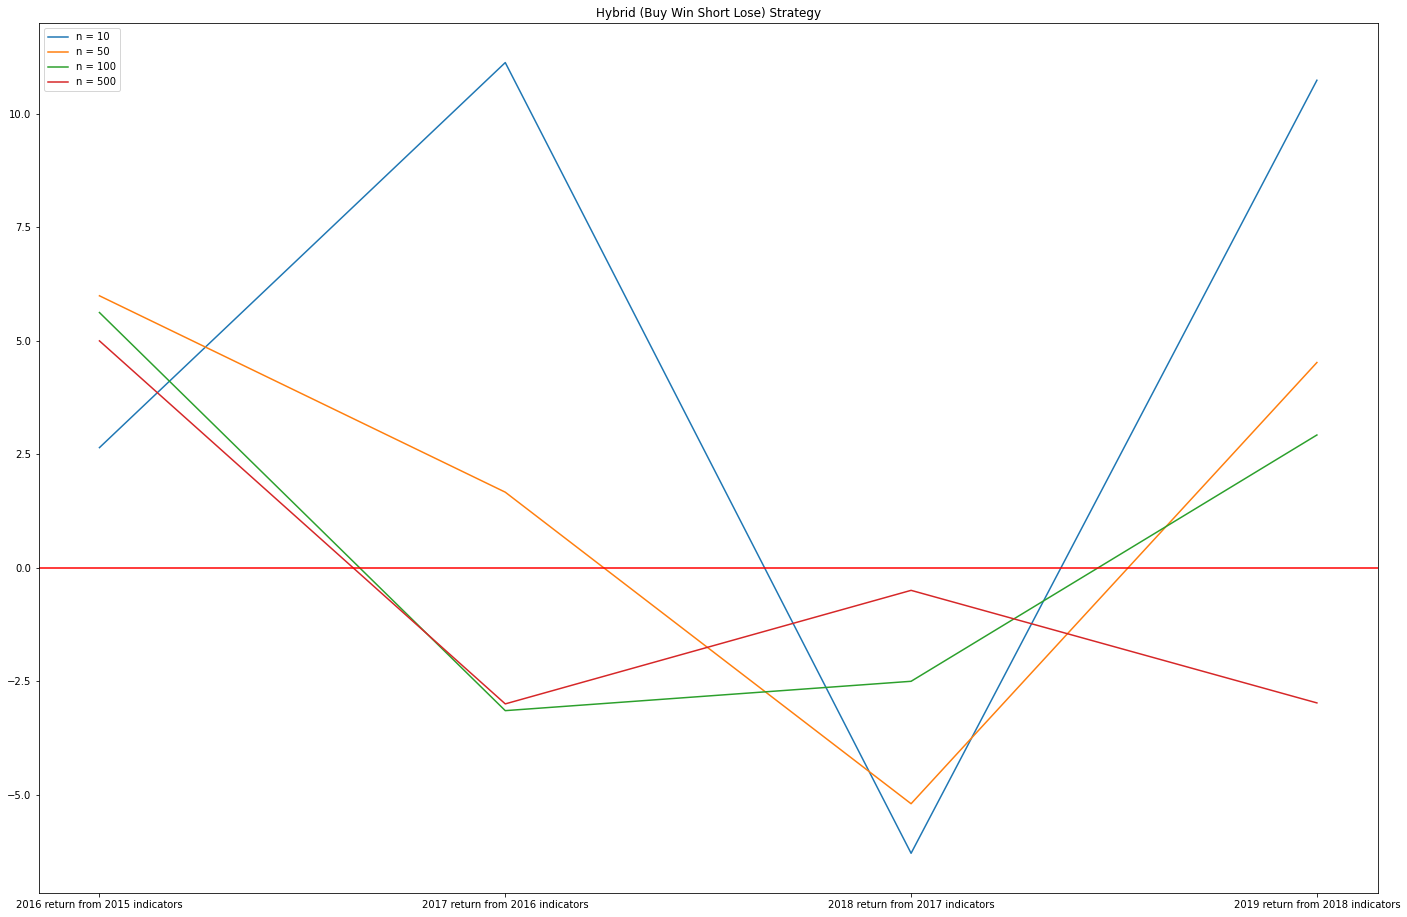

In [12]:
x = ['2016 return from 2015 indicators','2017 return from 2016 indicators','2018 return from 2017 indicators','2019 return from 2018 indicators']

# hybrid strategy with n = 10, nbuy = 5, nshort = 5
y10 = buy_win_short_lose(10)
print("n = 10:", y10)

# hybrid strategy with n = 50, nbuy = 25, nshort = 25
y50 = buy_win_short_lose(50)
print("n = 50:", y50)

# hybrid strategy with n = 100, nbuy = 50, nshort = 50
y100 = buy_win_short_lose(100)
print("n = 100:", y100)

# hybrid strategy with n = 500, nbuy = 250, nshort = 250
y500 = buy_win_short_lose(500)
print("n = 500:", y500)

plt.figure(figsize=(24, 16))

plt.plot(x,y10,label="n = 10")
plt.plot(x,y50,label="n = 50")
plt.plot(x,y100,label="n = 100")
plt.plot(x,y500,label="n = 500")

plt.title("Hybrid (Buy Win Short Lose) Strategy")
plt.legend()
plt.axhline(0, color='red')
plt.show()

## 4.6 Findings and Insights
- Buy Winning Strategy performs best for our test stock data between 2015-2018.
- Short Losing Strategy did not perform well because the penalty for short selling instead of buying winning stocks is much higher than penalty for buying instead of short selling losing stocks (There are much more stocks with very high PRICE VAR [%] compared to stocks with very low PRICE VAR [%]).
- Although Hybrid Strategy did not perform as well as Winning Strategy, it may be less risky (fluctuates less).
- By increasing the number of stocks (n) in the portfolio, the return tends to be less risky (fluctuate less). This result is probably the effect of portfolio diversification.
- After increasing the number of stocks (n) in the portfolio to one point, there will be no more diversification effect (fluctuation of n = 100 and n = 500 portfolios are very similar).